# A Classification tree model to predict whether a particular movie will win the fictional Start-Tech Oscar

In [270]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [271]:
df = pd.read_csv("Movie_classificaton_data.csv", header=0)

In [272]:
df.head(10)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1
5,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425,YES,143.48,284.592,Comedy,53,460,57400,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,YES,139.16,243.664,Thriller,41,522,45800,0
7,22.8910,70.74,0.476,34285.460,169.6,6.980,7.075,6.875,7.170,7.96,400821,NO,116.84,243.536,Drama,56,571,44200,0
8,24.2248,70.74,0.476,31280.205,173.5,6.910,7.075,6.850,7.000,7.96,295168,YES,118.60,242.640,Comedy,55,564,33000,1
9,23.4008,70.74,0.476,33352.220,159.4,6.665,6.725,6.575,6.855,7.96,412012,YES,189.56,283.024,Thriller,45,508,37800,1


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

Missing Value Inputation using the mean method

In [274]:
mean_time_taken = df["Time_taken"].mean()

In [275]:
df["Time_taken"] = df["Time_taken"].fillna(mean_time_taken)

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

# Dummy Value Creation

In [277]:
df = pd.get_dummies(df, columns=["3D_available","Genre"], drop_first = True)

In [278]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


# X-y Split

In [279]:
X = df.loc[:,df.columns !="Start_Tech_Oscar"]
type(X)

pandas.core.frame.DataFrame

In [280]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [281]:
X.shape

(506, 20)

In [282]:
y = df["Start_Tech_Oscar"]

In [283]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

In [284]:
y.shape

(506,)

# Train-test Split

In [285]:
from sklearn.model_selection import train_test_split

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)

In [287]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,53400,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,43400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,54000,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,45800,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,20800,1,0,0,0


In [288]:
X_train.shape

(404, 20)

In [289]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 220 to 172
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    404 non-null    float64
 1   Production expense   404 non-null    float64
 2   Multiplex coverage   404 non-null    float64
 3   Budget               404 non-null    float64
 4   Movie_length         404 non-null    float64
 5   Lead_ Actor_Rating   404 non-null    float64
 6   Lead_Actress_rating  404 non-null    float64
 7   Director_rating      404 non-null    float64
 8   Producer_rating      404 non-null    float64
 9   Critic_rating        404 non-null    float64
 10  Trailer_views        404 non-null    int64  
 11  Time_taken           404 non-null    float64
 12  Twitter_hastags      404 non-null    float64
 13  Avg_age_actors       404 non-null    int64  
 14  Num_multiplex        404 non-null    int64  
 15  Collection           404 non-null    i

In [290]:
X_test.shape

(102, 20)

# Training Classification Tree

In [291]:
from sklearn import tree


In [292]:
clftree = tree.DecisionTreeClassifier(max_depth=3)

In [293]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

# Predict Values Using Trained Model

In [294]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [295]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

## Model Performance

In [296]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [297]:
confusion_matrix(y_train, y_train_pred)

array([[172,  14],
       [126,  92]], dtype=int64)

In [298]:
confusion_matrix(y_test, y_test_pred)

array([[39,  5],
       [41, 17]], dtype=int64)

In [299]:
accuracy_score(y_test, y_test_pred)

0.5490196078431373

## Plotting decision tree

In [300]:
dot_data = tree.export_graphviz(clftree, out_file=None, feature_names = X_train.columns, filled = True)

In [301]:
from IPython.display import Image

In [302]:
import pydotplus

In [303]:
graph = pydotplus.graph_from_dot_data(dot_data)

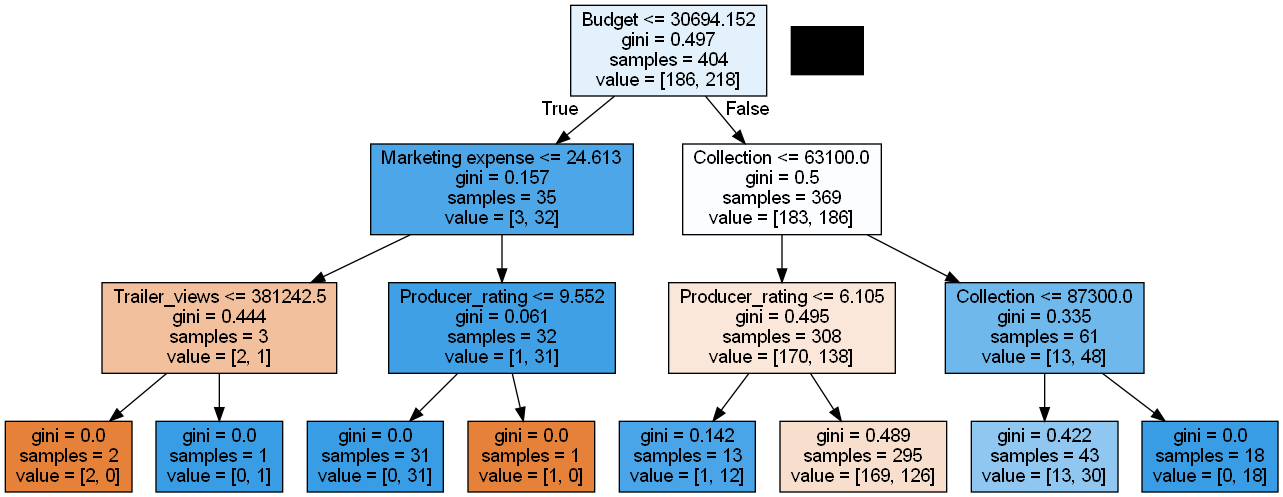

In [304]:
Image(graph.create_png())

## Controlling Tree growth

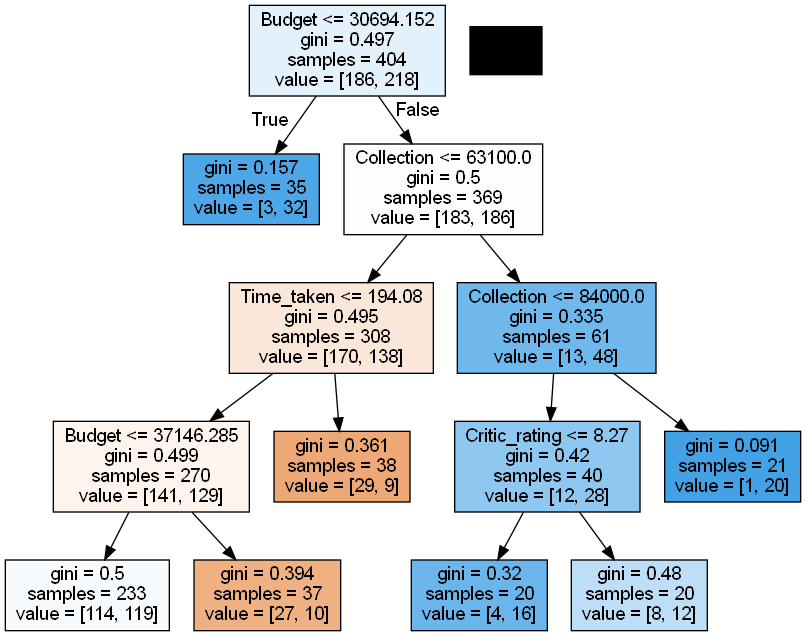

In [305]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None, feature_names =X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [306]:
accuracy_score(y_test, clftree2.predict(X_test))

0.5588235294117647

## Ensemble Technique (Bagging)

In [307]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier() # no pruning

In [308]:
from sklearn.ensemble import BaggingClassifier

Create 1000 trees and average outthe result of those trees to get our final value. 

Bootstrap = 0, take the subsetsfor each of the 1000 trees with replacement from the original dataset.

njobs = -1. Utilize the full processiong of the computer.

In [309]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs =1,
                            random_state=0)

In [310]:
bag_clf.fit(X_train, y_train)

c:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# confusion matrix
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[28, 16],
       [21, 37]], dtype=int64)

In [ ]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.6372549019607843

## Ensemble(Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs= -1, random_state=0)

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [ ]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[25, 19],
       [19, 39]], dtype=int64)

In [ ]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.6274509803921569

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_clv = RandomForestClassifier(n_estimators=250, random_state=0)

In [ ]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
               "min_samples_split":[2,3,10]}

In [ ]:
grid_search = GridSearchCV(rf_clv, params_grid,
                           n_jobs=-1, cv=5, scoring="accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250, random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'min_samples_split': 3}

In [ ]:
cvrf_clf = grid_search.best_estimator_

In [ ]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.6470588235294118

In [ ]:
confusion_matrix(y_test,cvrf_clf.predict(X_test))

array([[26, 18],
       [18, 40]], dtype=int64)

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
g_boost_clf = GradientBoostingClassifier()
g_boost_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
accuracy_score(y_test, g_boost_clf.predict(X_test))

0.5784313725490197

In [ ]:
g_boost_clf2 = GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000, max_depth=1)
g_boost_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [ ]:
accuracy_score(y_train, g_boost_clf2.predict(X_train))

0.7623762376237624

In [ ]:
accuracy_score(y_test,g_boost_clf2.predict(X_test) )

0.6176470588235294

Grid Search

In [ ]:
g_boost_clf3 = GradientBoostingClassifier(random_state=0)


In [ ]:
grid_params = {"learning_rate": [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2],
               "max_depth":[1,2,3,4,5],"n_estimators":[200, 250, 500, 800, 1000]}

In [ ]:
grid_search = GridSearchCV(g_boost_clf3, grid_params,
                           n_jobs=-1, cv=5, scoring="accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.07, 0.08, 0.09, 0.1, 0.2],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [200, 250, 500, 800, 1000]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 800}

In [ ]:
best_est = grid_search.best_estimator_

In [ ]:
accuracy_score(y_test, best_est.predict(X_test))

0.5686274509803921

# Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_class = AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [ ]:
ada_class.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [ ]:
accuracy_score(y_train, ada_class.predict(X_train))

0.8886138613861386

In [ ]:
accuracy_score(y_test, ada_class.predict(X_test))

0.6274509803921569

In [ ]:
ada_class2 = AdaBoostClassifier(rf_clf, learning_rate=0.05, n_estimators= 500)

In [ ]:
ada_class2.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=1000,
                                                    n_jobs=-1, random_state=0),
                   learning_rate=0.05, n_estimators=500)

In [ ]:
accuracy_score(y_test, ada_class2.predict(X_test))

0.6078431372549019

## XG Boost

In [317]:
import xgboost as xgb

In [ ]:
#### Parameter Tuning
General Parameters: Guide the overall functioning
Boosting Paramaters: Guide the individual booster(tree/regression) at each step
Learning Task Parameters : Guide the optimization performed

In [319]:
xgb_class = xgb.XGBClassifier(max_depth=5,n_estimators=10000, learning_rate=0.3,
n_jobs=-1)

In [320]:
xgb_class.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [321]:
accuracy_score(y_test, xgb_class.predict(X_test))

0.6666666666666666

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

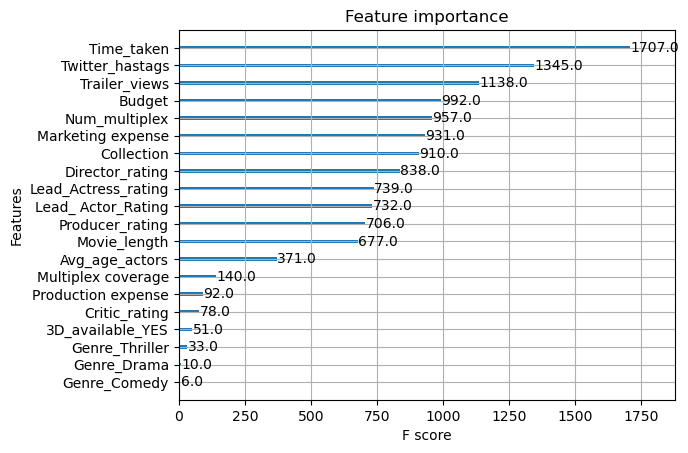

In [322]:
xgb.plot_importance(xgb_class)

In [323]:
xgb_class = xgb.XGBClassifier(n_estimators=500, learning_rate=0.1, random_state=0)

In [327]:
param_test1 ={
    "max_depth": range(3,10,2),
    "gamma" :[0.1, 0.2,0.3],
    "subsample":[0.8,0.9],
    "colsample_bytree":[0.8,0.9],
    "reg_alpha":[1e-2,0.1,1]
}

In [328]:
grid_search = GridSearchCV(xgb_class, param_test1, n_jobs=-1, cv=5, scoring='accuracy')

In [329]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [330]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.3,
 'max_depth': 9,
 'reg_alpha': 0.1,
 'subsample': 0.9}

In [331]:
xgb_est = grid_search.best_estimator_

In [333]:
accuracy_score(y_test, xgb_est.predict(X_test))

0.6764705882352942